In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-03-29 14:15:42.340125: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 14:15:42.340145: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
df = pd.read_csv('./data/ouput.csv')

In [3]:
df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000168,2011-11-24 13:30:00,0.054
1,MAC000168,2011-11-24 14:00:00,0.178
2,MAC000168,2011-11-24 14:30:00,0.113
3,MAC000168,2011-11-24 15:00:00,0.068
4,MAC000168,2011-11-24 15:30:00,0.061


In [4]:
df.shape

(396552, 3)

In [5]:
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

max_value_energy = df["energy(kWh/hh)"].max()
max_value_energy


4.595

In [6]:
#max value for hh doesnt compare with hourly
#df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)

In [7]:
# Sorting the values
#df.sort_values('tstp', inplace=True)

In [8]:
df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000168,2011-11-24 13:30:00,0.054
1,MAC000168,2011-11-24 14:00:00,0.178
2,MAC000168,2011-11-24 14:30:00,0.113
3,MAC000168,2011-11-24 15:00:00,0.068
4,MAC000168,2011-11-24 15:30:00,0.061


In [9]:
df['energy(kWh/hh)'].max()

4.595

In [10]:
df['energy(kWh/hh)'].min()

0.0

In [11]:
from ML_classes.LSTMModel import LSTMModel

In [12]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
#hh = hh.set_index("tstp")
#hh = hh.resample("H").sum()
#hh = hh.reset_index()

hh_max = hh['energy(kWh/hh)'].max()
hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)

/tmp/ipykernel_213102/194026773.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)


In [13]:
#normalizedtstp = (hh["tstp"] - hh["tstp"].mean()) / hh["tstp"].std()
#normalizedtstp
type(hh.iloc[0]["energy(kWh/hh)"])

numpy.float64

In [14]:
# Initiating the class
deep_learner = LSTMModel(
data = hh,
Y_var = 'energy(kWh/hh)',
lag = 48,
LSTM_layer_depth = 50,
epochs =20,
batch_size = 256,
train_test_split = 0.15
)


In [15]:
# Fitting the model

model = deep_learner.LSTModel()

2022-03-29 14:15:46.937561: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-29 14:15:46.937868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-29 14:15:46.937931: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-29 14:15:46.937981: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-29 14:15:46.938024: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/20
132/132 [==============================] - 5s 29ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 2/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0049 - val_loss: 0.0051
Epoch 3/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 4/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 5/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0044 - val_loss: 0.0047
Epoch 6/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 7/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 8/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0043 - val_loss: 0.0047
Epoch 9/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0043 - val_loss: 0.0046
Epoch 10/20
132/132 [==============================] - 4s 28ms/step - loss: 0.0043 - val_lo

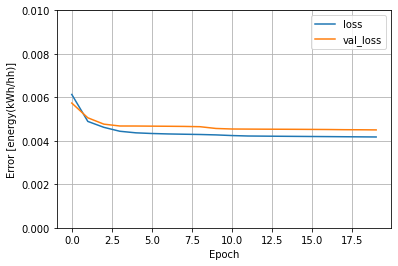

In [16]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 0.01])
    plt.xlabel('Epoch')
    plt.ylabel('Error [energy(kWh/hh)]')
    plt.legend()
    plt.grid(True)
plot_loss(deep_learner.history)

In [17]:
# Defining the lag that we used for training of the model 
lag_model = 48
# Getting the last period
ts = hh['energy(kWh/hh)'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.dc.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)
yhat

array([[0.045247]], dtype=float32)

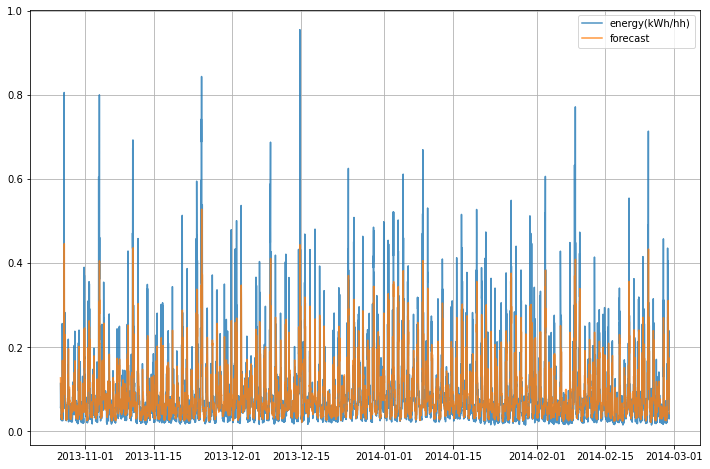

In [18]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_213102/370916521.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


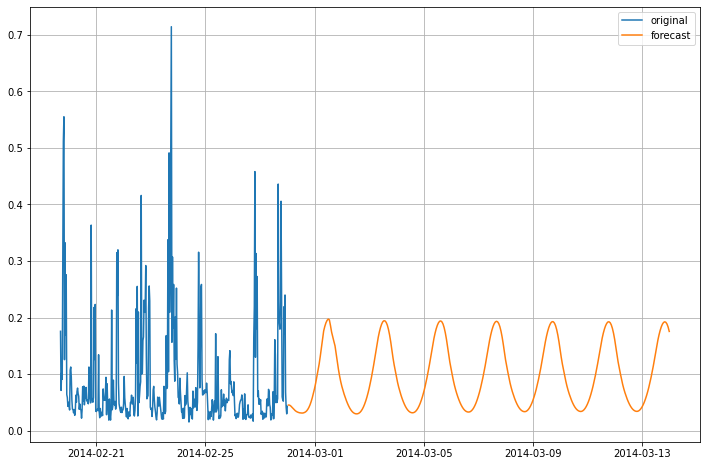

In [19]:


# Forecasting n steps ahead
n_ahead = 168*2
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

# Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

# Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [20]:
#deep_learner.save_lstm_model()

In [21]:
deep_learner.eval.MSE()

0.004502338258874207

In [22]:
deep_learner.eval.RMSE()

0.06709946541422075

In [23]:
deep_learner.eval.MAE()

0.037306932985946235

In [24]:
deep_learner.eval.MAPE()

47.219953012255004

In [25]:
peaks, peak_dates, peak_indexes, res = deep_learner.eval.peak_daily_consumption()
pred = deep_learner.predict()
res

59.56527182737157

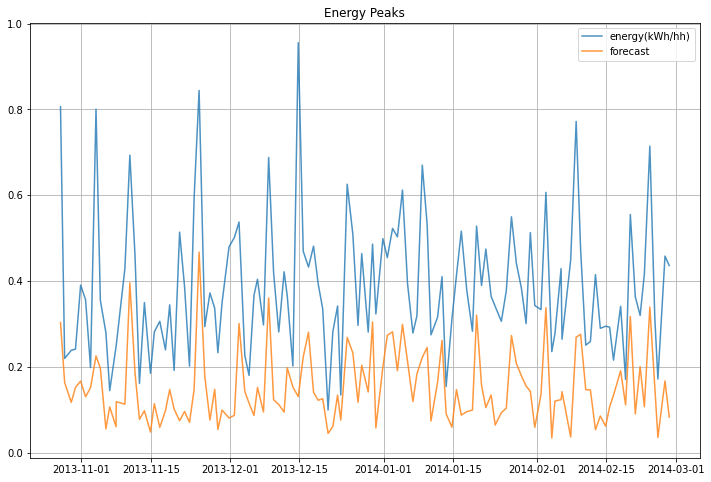

In [26]:
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat


hat_frame = pd.DataFrame({
    'tstp': peak_dates, 
    'energy(kWh/hh)': peaks,
    'forecast': [pred[x] for x in peak_indexes], 
    'type': 'forecast'
})

# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=hat_frame,
    label=dtype,
    alpha=0.8
  )
plt.title( "Energy Peaks")
plt.legend()
plt.grid()

In [27]:
#train for all houses
lclid_list = df['LCLid'].unique().tolist()
#print(type(lclid_list))
mse = []
rmse = []
mae = []
mape = []
for lclid in lclid_list:
    #print(lclid)


    hh = find_household(lclid)
    hh.pop("LCLid")
    hh = hh.set_index("tstp")
    hh = hh.resample("H").sum()
    hh = hh.reset_index()

    hh_max = hh['energy(kWh/hh)'].max()
    hh['energy(kWh/hh)'] = hh['energy(kWh/hh)'].apply(lambda x: x / hh_max)
    
    # Initiating the class
    deep_learner = LSTMModel(
        data = hh,
        Y_var = 'energy(kWh/hh)',
        lag = 24,
        LSTM_layer_depth = 50,
        epochs =20,
        batch_size = 256,
        train_test_split = 0.15
    )
    #training
    model = deep_learner.LSTModel()
    
    mse.append(deep_learner.eval.MSE())
    rmse.append(deep_learner.eval.RMSE())
    mae.append(deep_learner.eval.MAE())
    mape.append(deep_learner.eval.MAPE())
houses = pd.Series(data=lclid_list,name="lclid")
mse = pd.Series(data=mse,name="mse")
rmse = pd.Series(data=rmse,name="rmse")
mae = pd.Series(data=mae,name="mae")
mape = pd.Series(data=mape,name="mape")

res_df = pd.merge(houses, mse, right_index=True, left_index=True)
res_df["rmse"] = rmse
res_df["mae"] = mae
res_df["mape"] = mape


Epoch 1/20
66/66 [==============================] - 2s 17ms/step - loss: 0.0037 - val_loss: 0.0062
Epoch 2/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0034 - val_loss: 0.0062
Epoch 3/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 4/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 5/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0032 - val_loss: 0.0060
Epoch 6/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 7/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0031 - val_loss: 0.0058
Epoch 8/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0057
Epoch 9/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 10/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0030 - val_loss: 0.0056
Epoch 11/

66/66 [==============================] - 1s 15ms/step - loss: 0.0079 - val_loss: 0.0093
Epoch 4/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0076 - val_loss: 0.0085
Epoch 5/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0078 - val_loss: 0.0079
Epoch 6/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0075 - val_loss: 0.0078
Epoch 7/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0073 - val_loss: 0.0076
Epoch 8/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0072 - val_loss: 0.0075
Epoch 9/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0071 - val_loss: 0.0075
Epoch 10/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0070 - val_loss: 0.0074
Epoch 11/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 12/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0069 - val_loss: 0.0074
Epoch 13/20
66/66 

66/66 [==============================] - 1s 15ms/step - loss: 0.0108 - val_loss: 0.0039
Epoch 6/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0093 - val_loss: 0.0039
Epoch 7/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0087 - val_loss: 0.0039
Epoch 8/20
66/66 [==============================] - 1s 15ms/step - loss: 0.0086 - val_loss: 0.0039
Epoch 9/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0085 - val_loss: 0.0038
Epoch 10/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 11/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0081 - val_loss: 0.0038
Epoch 12/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0079 - val_loss: 0.0038
Epoch 13/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0078 - val_loss: 0.0038
Epoch 14/20
66/66 [==============================] - 1s 16ms/step - loss: 0.0077 - val_loss: 0.0038
Epoch 15/20
66/6

In [28]:
res_df

,lclid,mse,rmse,mae,mape
0,MAC000168,0.005088,0.071331,0.030776,89.938596
1,MAC000169,0.004433,0.066581,0.037164,42.275391
2,MAC000179,0.004004,0.063277,0.036746,48.425408
3,MAC000181,0.003389,0.058216,0.026337,28.428340
4,MAC000165,0.006909,0.083120,0.051465,28.113637
5,MAC000173,0.011672,0.108039,0.069132,41.410198
6,MAC000152,0.007512,0.086669,0.047625,79.290155
7,MAC000153,0.007649,0.087459,0.059687,45.451069
8,MAC000159,0.003747,0.061215,0.038535,35.241402
9,MAC000150,0.005327,0.072989,0.043153,46.562718
